**Table of contents**<a id='toc0_'></a>    
- 1. [Imports](#toc1_)    
- 2. [Model class](#toc2_)    
  - 2.1. [Basic Edgeworth box](#toc2_1_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## 1. <a id='toc1_'></a>[Imports](#toc0_)

In [12]:
from types import SimpleNamespace
import numpy as np
from scipy import optimize
import pandas as pd 
import matplotlib.pyplot as plt
import warnings

plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 2. <a id='toc2_'></a>[Model class](#toc0_)

In [13]:
from inauguralproject import *

### 2.1. <a id='toc2_1_'></a>[Basic Edgeworth box](#toc0_)

In [14]:
model = ExchangeEconomyClass()

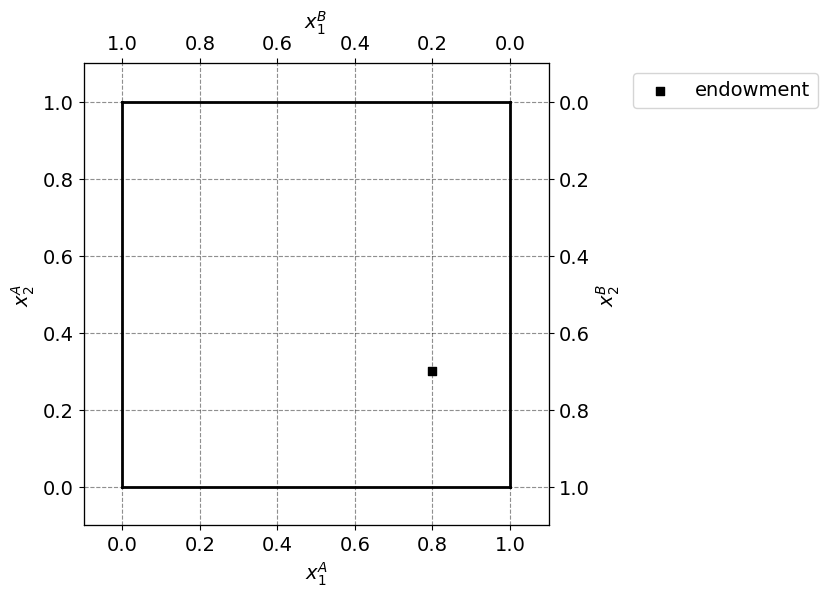

In [15]:
par = model.par

# a. total endowment
w1bar = 1.0
w2bar = 1.0

# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# A
ax_A.scatter(par.w1A,par.w2A,marker='s',color='black',label='endowment')

# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.6,1.0));

## 3. <a id='toc2_'></a>[Assignment](#toc0_)

### 3.1. Question 1

In [16]:
N = 75
x_vals = np.linspace(0, 1, N+1)
pareto_efficient_allocations = []

for x1A in x_vals:
    for x2A in x_vals:
        x1B = 1 - x1A
        x2B = 1 - x2A
        if model.utility_A(x1A,x2A) >= model.utility_A(par.w1A, par.w2A):
            if model.utility_B(x1B, x2B) >=  model.utility_B(par.w1B, par.w2B):
                pareto_efficient_allocations.append([x1A, x2A])
print("Pareto efficient allocations:")
print(pareto_efficient_allocations)


Pareto efficient allocations:
[[0.08, 0.9600000000000001], [0.09333333333333334, 0.88], [0.09333333333333334, 0.8933333333333334], [0.09333333333333334, 0.9066666666666667], [0.09333333333333334, 0.92], [0.09333333333333334, 0.9333333333333333], [0.09333333333333334, 0.9466666666666668], [0.09333333333333334, 0.9600000000000001], [0.10666666666666667, 0.8266666666666668], [0.10666666666666667, 0.8400000000000001], [0.10666666666666667, 0.8533333333333334], [0.10666666666666667, 0.8666666666666667], [0.10666666666666667, 0.88], [0.10666666666666667, 0.8933333333333334], [0.10666666666666667, 0.9066666666666667], [0.10666666666666667, 0.92], [0.10666666666666667, 0.9333333333333333], [0.10666666666666667, 0.9466666666666668], [0.10666666666666667, 0.9600000000000001], [0.12000000000000001, 0.7866666666666667], [0.12000000000000001, 0.8], [0.12000000000000001, 0.8133333333333334], [0.12000000000000001, 0.8266666666666668], [0.12000000000000001, 0.8400000000000001], [0.12000000000000001, 0

#### 3.1.1 figure 1

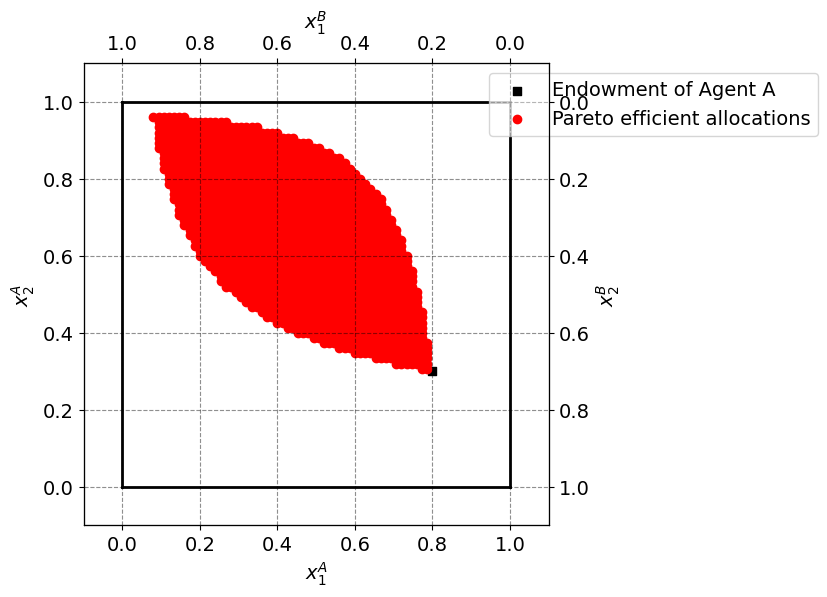

In [17]:
import matplotlib.pyplot as plt

# Define the parameters
par = model.par
w1bar = 1.0
w2bar = 1.0

# Plotting
fig = plt.figure(frameon=False, figsize=(6, 6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

# Set labels
ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# Plot endowment of agent A
ax_A.scatter(par.w1A, par.w2A, marker='s', color='black', label='Endowment of Agent A')

# Plot Pareto efficient allocations
pareto_x1A = [allocation[0] for allocation in pareto_efficient_allocations]
pareto_x2A = [allocation[1] for allocation in pareto_efficient_allocations]
ax_A.scatter(pareto_x1A, pareto_x2A, marker='o', color='red', label='Pareto efficient allocations')

# Plot limits of the Edgeworth box
ax_A.plot([0, w1bar], [0, 0], lw=2, color='black')
ax_A.plot([0, w1bar], [w2bar, w2bar], lw=2, color='black')
ax_A.plot([0, 0], [0, w2bar], lw=2, color='black')
ax_A.plot([w1bar, w1bar], [0, w2bar], lw=2, color='black')

# Set limits
ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

# Legend
ax_A.legend(frameon=True, loc='upper right', bbox_to_anchor=(1.6, 1.0))

plt.show()


### 3.2. Question 2

In [18]:
P1 = [0.5] + [0.5 + 2*i/N for i in range(1, N+1)] + [2.5]
error_1 = []
error_2 = []

for p1 in P1:
    x1A_star, x2A_star = model.demand_A(p1)
    x1B_star, x2B_star = model.demand_B(p1)
    
    eps1 = x1A_star - model.par.w1A + x1B_star - model.par.w1B
    eps2 = x2A_star - model.par.w2A + x2B_star - model.par.w2B
    
    error_1.append(eps1)
    error_2.append(eps2)

print("Error in market clearing condition 1:")
print(error_1)
print("Error in market clearing condition 2:")
print(error_2)

Error in market clearing condition 1:
[0.533333333333333, 0.47594936708860747, 0.42409638554216855, 0.3770114942528735, 0.33406593406593377, 0.2947368421052629, 0.2585858585858586, 0.22524271844660193, 0.19439252336448576, 0.16576576576576557, 0.13913043478260856, 0.11428571428571421, 0.09105691056910548, 0.06929133858267705, 0.048854961832061006, 0.029629629629629395, 0.011510791366906414, -0.00559440559440566, -0.021768707482993255, -0.037086092715232055, -0.05161290322580642, -0.06540880503144664, -0.07852760736196335, -0.09101796407185642, -0.1029239766081873, -0.11428571428571432, -0.12513966480446936, -0.13551912568306013, -0.14545454545454545, -0.15497382198952886, -0.16410256410256419, -0.17286432160804022, -0.18128078817734006, -0.1893719806763286, -0.19715639810426555, -0.20465116279069773, -0.21187214611872152, -0.2188340807174889, -0.22555066079295166, -0.2320346320346321, -0.23829787234042554, -0.2443514644351465, -0.2502057613168725, -0.2558704453441297, -0.26135458167330

### 3.3. Question 3

In [20]:
from scipy.optimize import minimize

# Define a function to compute the squared sum of errors
def error_function(p):
    eps1, eps2 = model.check_market_clearing(p[0])
    return eps1**2 + eps2**2  # Sum of squared errors

# Initial guess for the price of good A (p1)
initial_guess = 1.0  

# Perform optimization to minimize the error function
result = minimize(error_function, [initial_guess], method='Nelder-Mead')

# Extract the optimized price of good A
market_clearing_price = result.x[0]

print("Market clearing price:", market_clearing_price)

Market clearing price: 0.9444335937499998


### 3.4. Question 4a

In [27]:
from scipy.optimize import minimize_scalar
# Define the utility function for agent A
def utility_A(p1, omega_B):
    x1B, x2B = model.demand_B(p1)
    return model.utility_A(1 - x1B, 1 - x2B)

# Define the objective function to be maximized
def objective_function(p1):
    if p1 not in P1:
        return float('inf')  # Return a large value to penalize if p1 is not in P1
    return -utility_A(p1, model.par.w2B)

# Find the price that maximizes agent A's utility within P1
result = minimize_scalar(objective_function, bounds=(min(P1), max(P1)), method='bounded')

# Extract the optimal price
optimal_price_p1 = result.x

# Calculate the corresponding allocation
optimal_x1B, optimal_x2B = model.demand_B(optimal_price_p1)
optimal_allocation_A = (1 - optimal_x1B, 1 - optimal_x2B)

print("Optimal price chosen by agent A:", optimal_price_p1)
print("Optimal allocation chosen by agent A (1-xB1, 1-xB2):", optimal_allocation_A)

Optimal price chosen by agent A: 2.4999960023848327
Optimal allocation chosen by agent A (1-xB1, 1-xB2): (0.6799997015109236, 0.6000002665076778)


### 3.5. Question 4b

In [47]:
from scipy.optimize import minimize

# Define the utility function for agent A
def utility_A(p1, omega_B):
    x1B, x2B = model.demand_B(p1)
    return model.utility_A(1 - x1B, 1 - x2B)

# Define the objective function to be maximized
def objective_function(p1):
    if p1 <= 0:
        return float('inf')  # Return infinity if p1 is not positive
    return -utility_A(p1, model.par.w2B)  # Negate utility to turn maximization into minimization

# Initial guess for p1
initial_guess = 1.0

# Perform optimization to maximize utility
result = minimize(objective_function, initial_guess, bounds=[(0, None)], method='L-BFGS-B')

# Extract the optimal price
optimal_price_p1 = result.x[0]

# Calculate the corresponding allocation
optimal_x1B, optimal_x2B = model.demand_B(optimal_price_p1)
optimal_allocation_A = (1 - optimal_x1B, 1 - optimal_x2B)

print("Optimal price chosen by agent A:", optimal_price_p1)
print("Optimal allocation chosen by agent A (1-xB1, 1-xB2):", optimal_allocation_A)


Optimal price chosen by agent A: 1.8992871628632455
Optimal allocation chosen by agent A (1-xB1, 1-xB2): (0.6209604481487943, 0.6400475224757837)


### 3.6. Question 5a

In [49]:
from scipy.optimize import minimize

# Define the utility function for agent A
def utility_A(xA1, xA2):
    return model.utility_A(xA1, xA2)

# Define the utility function for agent B
def utility_B(xB1, xB2):
    return model.utility_B(xB1, xB2)

# Define the objective function to be maximized
def objective_function(x):
    xA1, xA2 = x
    return -utility_A(xA1, xA2)

# Define the constraint functions
def constraint_A(x):
    xA1, xA2 = x
    return utility_A(xA1, xA2) - utility_A(model.par.w1A, model.par.w2A)

def constraint_B(x):
    xB1 = 1 - x[0]
    xB2 = 1 - x[1]
    return utility_B(xB1, xB2) - utility_B(model.par.w1B, model.par.w2B)

# Define the bounds for xA1 and xA2
N = 75
bounds = [(0, 1) for _ in range(2)]

# Initial guess for xA1 and xA2
initial_guess = [0.5, 0.5]

# Perform optimization to maximize utility subject to the constraints
result = minimize(objective_function, initial_guess, bounds=bounds, constraints=[{'type': 'ineq', 'fun': constraint_A}, {'type': 'ineq', 'fun': constraint_B}])

# Extract the optimal allocation
optimal_allocation_A = result.x

print("Optimal allocation chosen by agent A (xA1, xA2):", optimal_allocation_A)


Optimal allocation chosen by agent A (xA1, xA2): [0.68087076 0.72506828]


### 3.7. Question 5b

In [51]:
from scipy.optimize import minimize

# Define the utility function for agent A
def utility_A(xA1, xA2):
    return model.utility_A(xA1, xA2)

# Define the utility function for agent B
def utility_B(xB1, xB2):
    return model.utility_B(xB1, xB2)

# Define the objective function to be maximized
def objective_function(x):
    xA1, xA2 = x
    return -utility_A(xA1, xA2)

# Define the constraint function for agent B
def constraint_B(x):
    xB1 = 1 - x[0]
    xB2 = 1 - x[1]
    return utility_B(xB1, xB2) - utility_B(model.par.w1B, model.par.w2B)

# Initial guess for xA1 and xA2
initial_guess = [0.5, 0.5]

# Perform optimization to maximize utility subject to the constraint
result = minimize(objective_function, initial_guess, bounds=[(0, 1), (0, 1)], constraints={'type': 'ineq', 'fun': constraint_B})

# Extract the optimal allocation
optimal_allocation_A = result.x

print("Optimal allocation chosen by agent A (xA1, xA2):", optimal_allocation_A)


Optimal allocation chosen by agent A (xA1, xA2): [0.68087076 0.72506828]


### 3.8. Question 6a

In [52]:
from scipy.optimize import minimize

# Define the utility function for agent A
def utility_A(xA1, xA2):
    return model.utility_A(xA1, xA2)

# Define the utility function for agent B
def utility_B(xB1, xB2):
    return model.utility_B(xB1, xB2)

# Define the objective function to be maximized (aggregate utility)
def objective_function(x):
    xA1, xA2 = x
    xB1 = 1 - xA1
    xB2 = 1 - xA2
    return -(utility_A(xA1, xA2) + utility_B(xB1, xB2))

# Initial guess for xA1 and xA2
initial_guess = [0.5, 0.5]

# Perform optimization to maximize aggregate utility
result = minimize(objective_function, initial_guess, bounds=[(0, 1), (0, 1)])

# Extract the optimal allocation
optimal_allocation_A = result.x

print("Optimal allocation chosen to maximize aggregate utility (xA1, xA2):", optimal_allocation_A)


Optimal allocation chosen to maximize aggregate utility (xA1, xA2): [0.33333337 0.66666662]


### 3.9. Question 6b

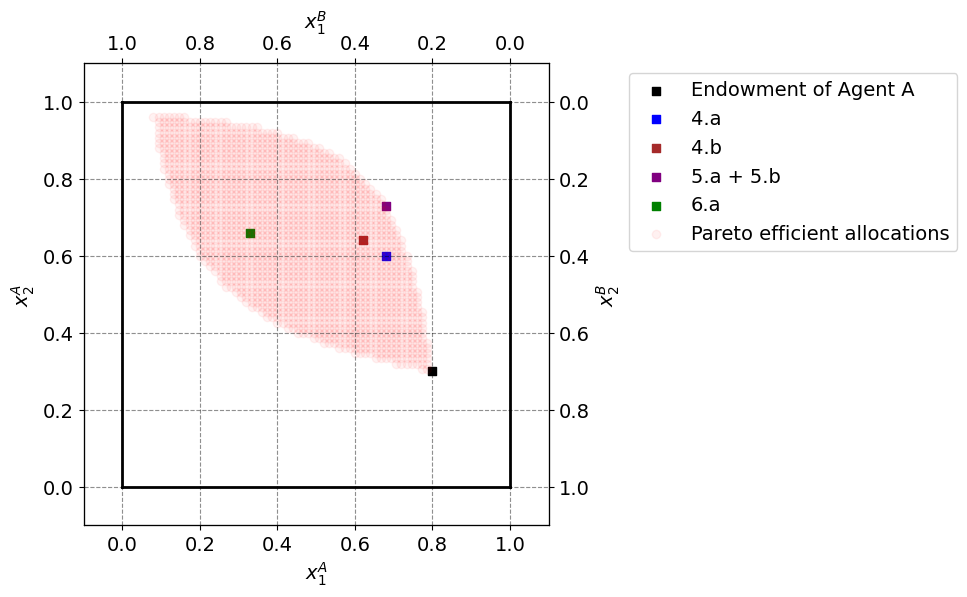

In [61]:
import matplotlib.pyplot as plt

# Define the parameters
par = model.par
w1bar = 1.0
w2bar = 1.0

# Plotting
fig = plt.figure(frameon=False, figsize=(6, 6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

# Set labels
ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# Plot endowment of agent A
ax_A.scatter(par.w1A, par.w2A, marker='s', alpha=1, color='black', label='Endowment of Agent A')
ax_A.scatter(0.68, 0.60, marker='s', alpha=1, color='blue', label='4.a')
ax_A.scatter(0.62, 0.64, marker='s', alpha=1, color='brown', label='4.b')
ax_A.scatter(0.68, 0.73, marker='s', alpha=1, color='purple', label='5.a + 5.b')
ax_A.scatter(0.33, 0.66, marker='s', alpha=1, color='green', label='6.a')

# Plot Pareto efficient allocations
pareto_x1A = [allocation[0] for allocation in pareto_efficient_allocations]
pareto_x2A = [allocation[1] for allocation in pareto_efficient_allocations]
ax_A.scatter(pareto_x1A, pareto_x2A, marker='o', alpha=0.05, color='red', label='Pareto efficient allocations')

# Plot limits of the Edgeworth box
ax_A.plot([0, w1bar], [0, 0], lw=2, color='black')
ax_A.plot([0, w1bar], [w2bar, w2bar], lw=2, color='black')
ax_A.plot([0, 0], [0, w2bar], lw=2, color='black')
ax_A.plot([w1bar, w1bar], [0, w2bar], lw=2, color='black')

# Set limits
ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

# Legend
ax_A.legend(frameon=True, loc='upper right', bbox_to_anchor=(1.9, 1.0))

plt.show()


### 3.10. Question 7

### 3.11. Question 8